In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#

/kaggle/input/sp-500-companies/sp500-constituents.csv


In [2]:
df = pd.read_csv('/kaggle/input/sp-500-companies/sp500-constituents.csv')
print(df.head())

  Ticker                     Name                Industry  \
0      A     Agilent Technologies             Health Care   
1    AAL  American Airlines Group             Industrials   
2    AAP       Advance Auto Parts  Consumer Discretionary   
3   AAPL               Apple Inc.  Information Technology   
4   ABBV                   AbbVie             Health Care   

                                 Sub-Industry    Headquarters Location  \
0                       Health Care Equipment  Santa Clara, California   
1                                    Airlines        Fort Worth, Texas   
2                           Automotive Retail  Raleigh, North Carolina   
3  Technology Hardware, Storage & Peripherals    Cupertino, California   
4                             Pharmaceuticals  North Chicago, Illinois   

   Date added  
0    6/5/2000  
1   3/23/2015  
2    7/9/2015  
3  11/30/1982  
4  12/31/2012  


In [3]:
df.tail()

,Ticker,Name,Industry,Sub-Industry,Headquarters Location,Date added
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",10/6/1997
499,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",8/7/2001
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",12/23/2019
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",6/22/2001
502,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",6/21/2013


In [4]:
df.describe()

,Ticker,Name,Industry,Sub-Industry,Headquarters Location,Date added
count,503,503,503,503,503,459
unique,503,503,11,123,251,350
top,A,Agilent Technologies,Information Technology,Health Care Equipment,"New York City, New York",3/4/1957
freq,1,1,76,18,42,37


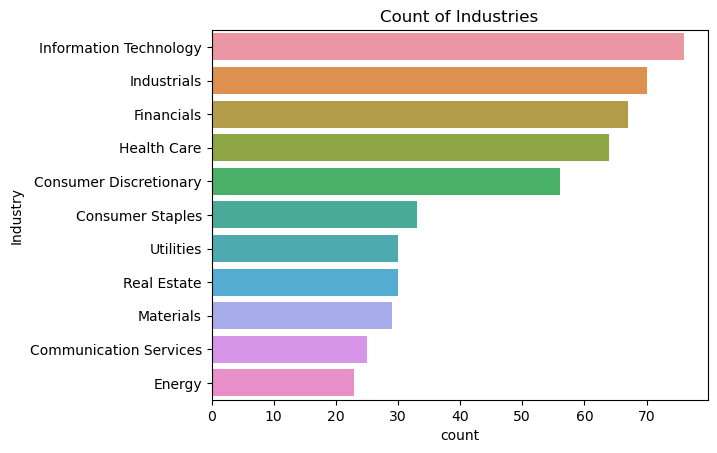

In [5]:
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index)
plt.title('Count of Industries')
plt.show()


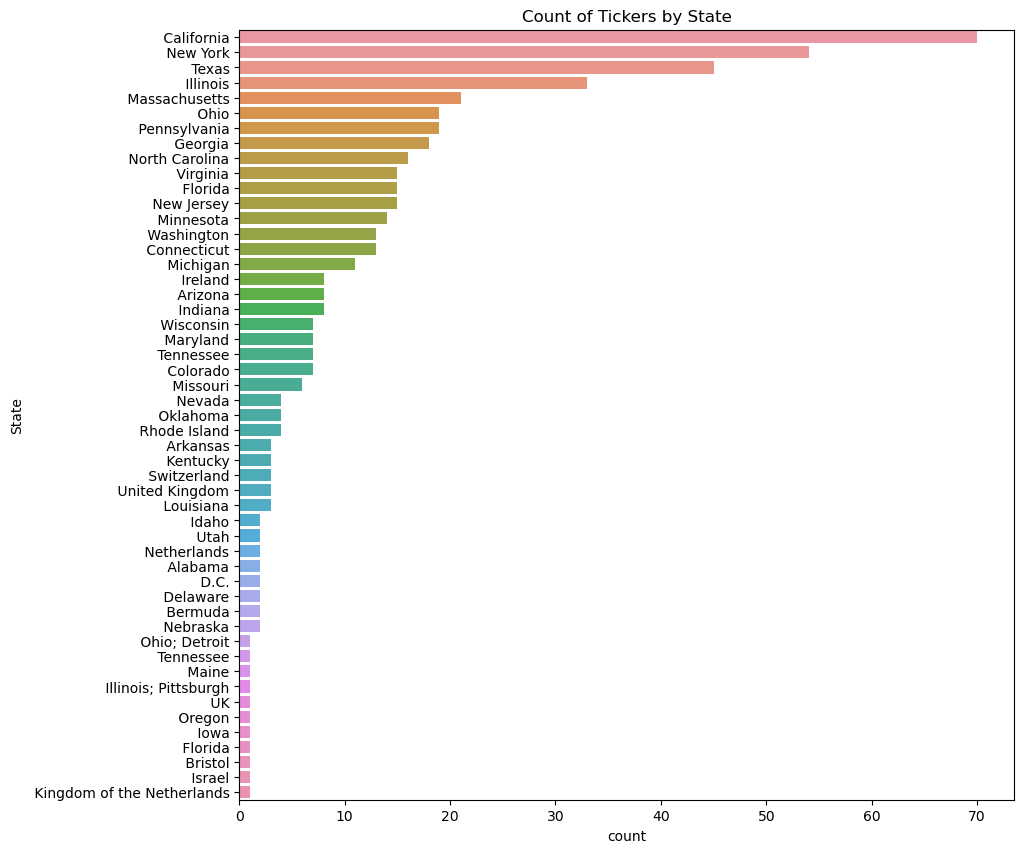

In [6]:
plt.figure(figsize=(10,10))
df['State'] = df['Headquarters Location'].str.split(',').str[1]
sns.countplot(y='State', data=df, order=df['State'].value_counts().index)
plt.title('Count of Tickers by State')
plt.show()


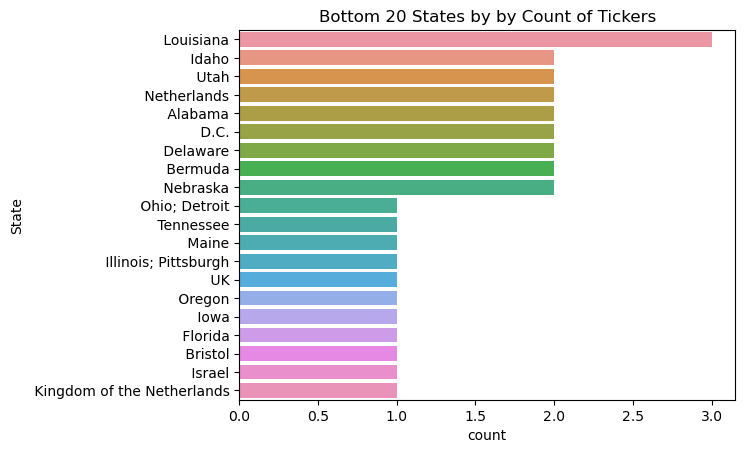

In [7]:
sns.countplot(y='State', data=df, order=df['State'].value_counts().iloc[-20:].index)
plt.title('Bottom 20 States by by Count of Tickers')
plt.show()

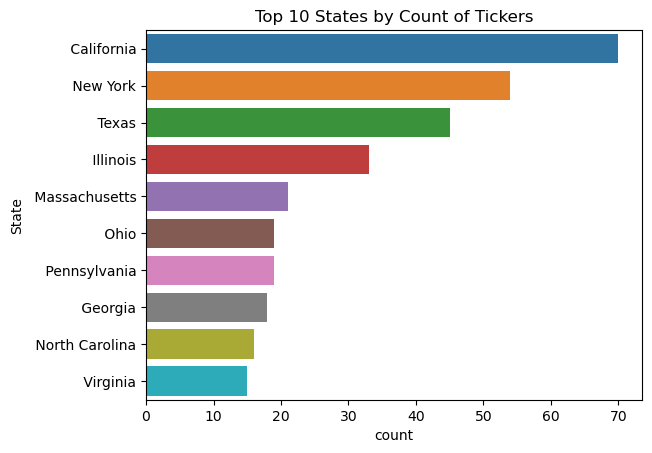

In [8]:
sns.countplot(y='State', data=df, order=df['State'].value_counts().iloc[:10].index)
plt.title('Top 10 States by Count of Tickers')
plt.show()

In [9]:
print("Count of Industries")
print(df['Industry'].value_counts())

Count of Industries
Information Technology    76
Industrials               70
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    25
Energy                    23
Name: Industry, dtype: int64


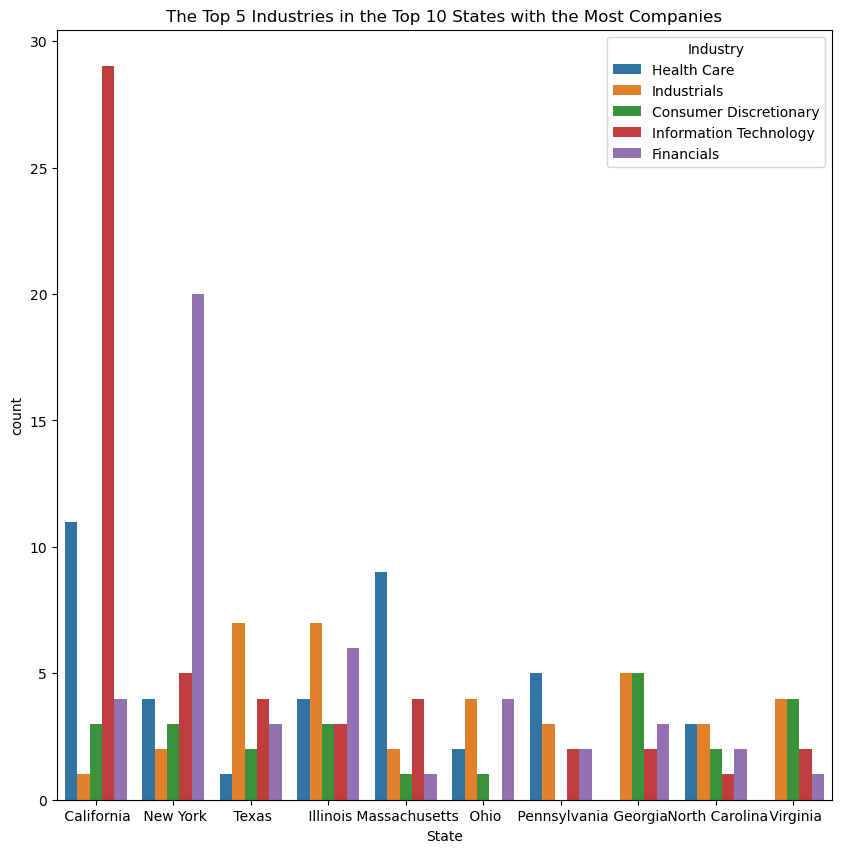

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x='State', data=df[df['Industry'].isin(['Information Technology', 'Industrials', 'Financials', 'Health Care', 'Consumer Discretionary'])], hue='Industry', order=df['State'].value_counts().iloc[:10].index)
plt.title('The Top 5 Industries in the Top 10 States with the Most Companies')
plt.show()

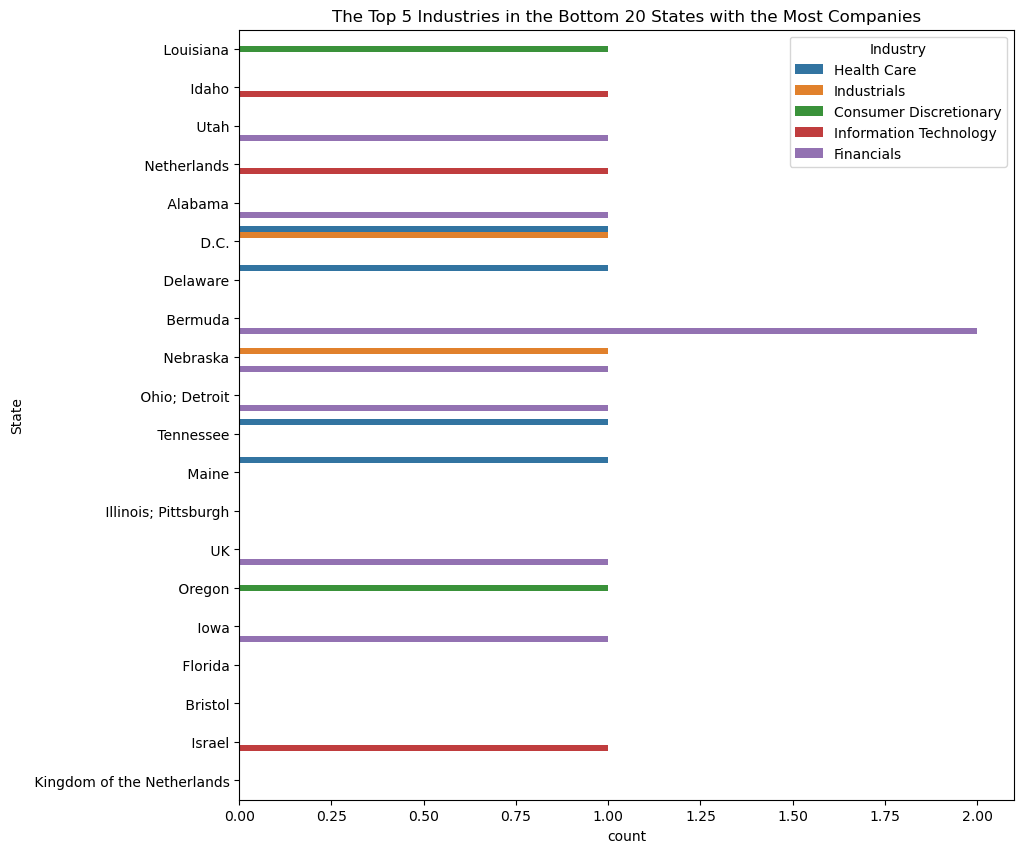

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(y='State', data=df[df['Industry'].isin(['Information Technology', 'Industrials', 'Financials', 'Health Care', 'Consumer Discretionary'])], hue='Industry', order=df['State'].value_counts().iloc[-20:].index)
plt.title('The Top 5 Industries in the Bottom 20 States with the Most Companies')
plt.show()

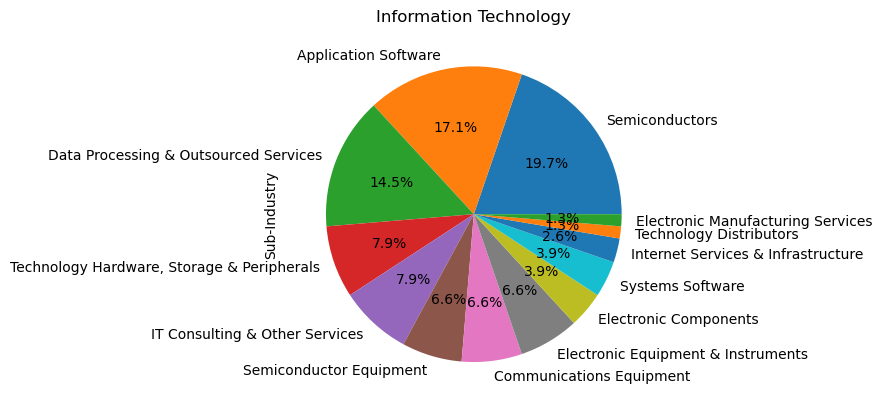

In [12]:
df[df['Industry'] == 'Information Technology']['Sub-Industry'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Information Technology')
plt.show()

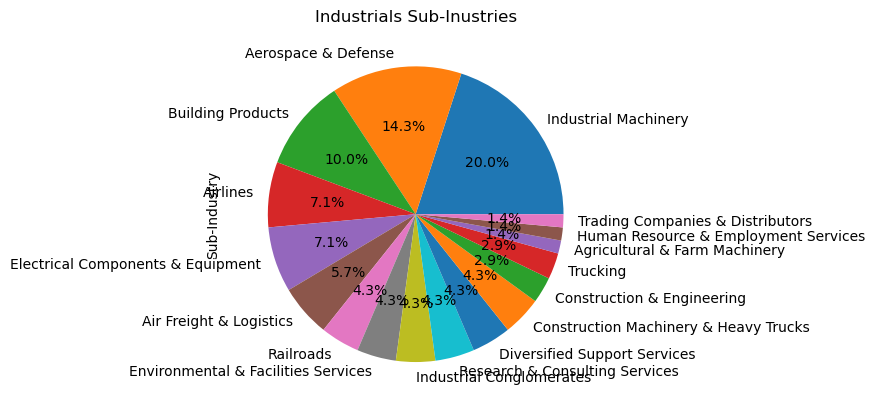

In [13]:
df[df['Industry'] == 'Industrials']['Sub-Industry'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Industrials Sub-Inustries')
plt.show()

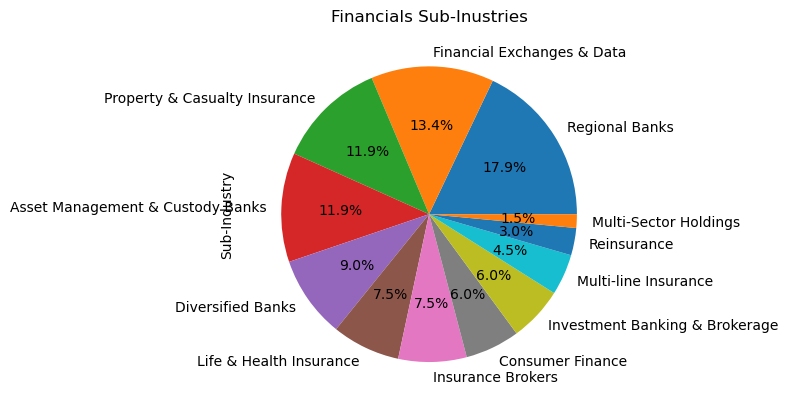

In [14]:
df[df['Industry'] == 'Financials']['Sub-Industry'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Financials Sub-Inustries')
plt.show()

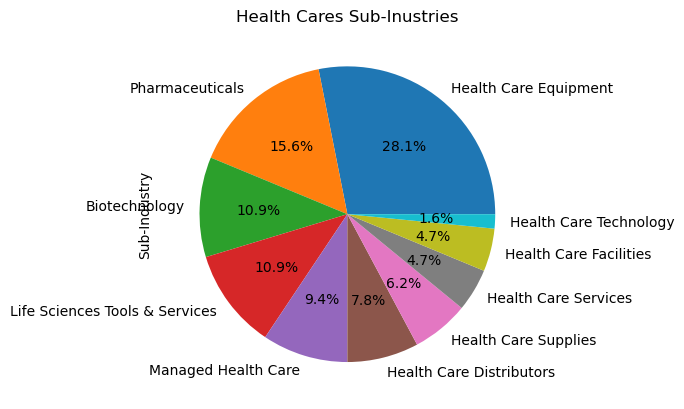

In [15]:
df[df['Industry'] == 'Health Care']['Sub-Industry'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Health Cares Sub-Inustries')
plt.show()

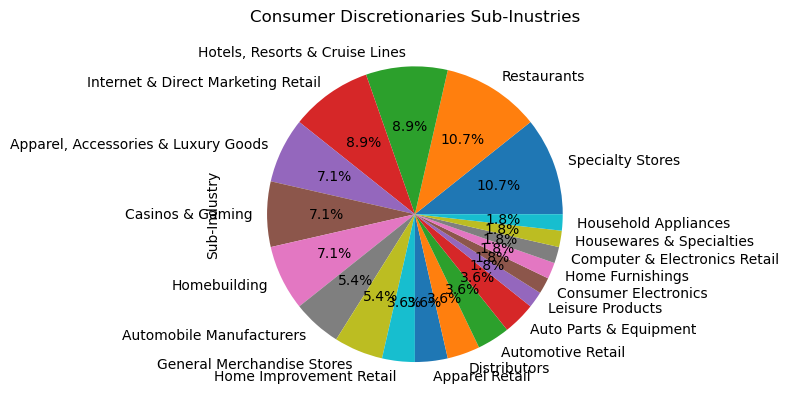

In [16]:
df[df['Industry'] == 'Consumer Discretionary']['Sub-Industry'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Consumer Discretionaries Sub-Inustries')
plt.show()

In [17]:
df['Year Added'] = df['Date added'].str.split('-').str[0]

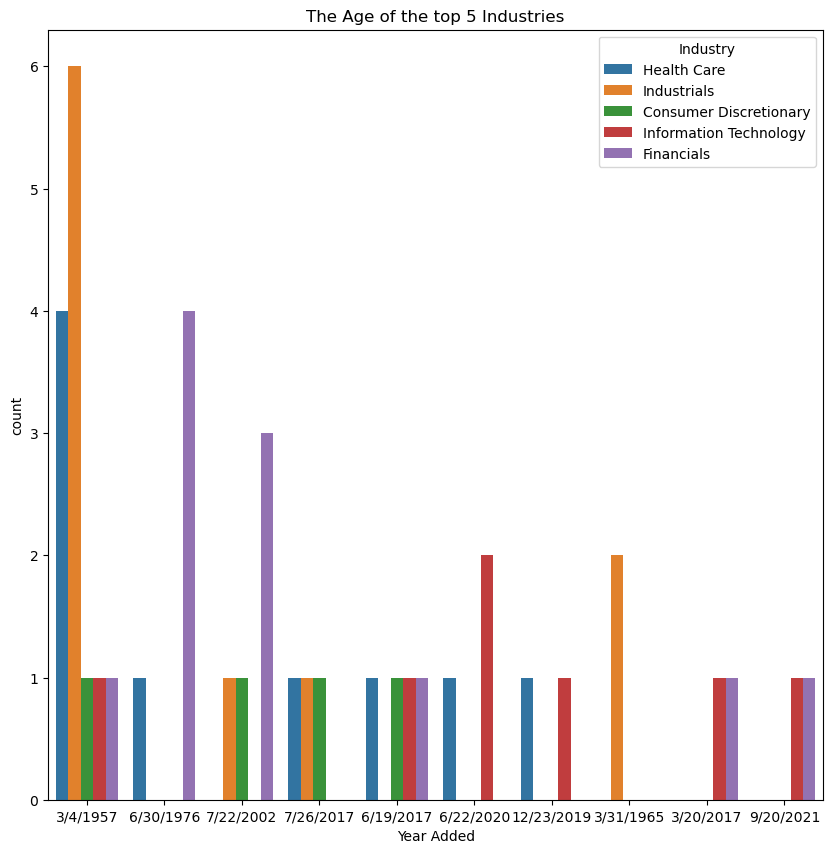

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='Year Added', data=df[df['Industry'].isin(['Information Technology', 'Industrials', 'Financials', 'Health Care', 'Consumer Discretionary'])], hue='Industry', order=df['Year Added'].value_counts().iloc[:10].index)
plt.title('The Age of the top 5 Industries')
plt.show()